<a href="https://colab.research.google.com/github/voleka-ocrv/AvitoAnalyticsAcademy/blob/main/ch2_statistical_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Мощность

Стат.критерий - строгое правило, чтобы отвергнуть / не отвергнуть гипотезу H0 с фиксированным уровнем стат значимости **alpha**.

$FPP = \frac{FP}{FP + TN}$ - вероятность ошибочно отвергнуть H0

$𝐏(S=1|H_0 верна)$

Вероятность того, что мы заявили, что совершили открытие (S=1), при том, что на самом деле была верна H0 (никакого изменения нет).

В примере с инвесторами, которые выделяют деньги и допускают возможность вероятность ошибиться с вероятностью alpha.

Можно придумать критерий, у которого alpha=0, вероятность ошибиться и ошибочно отклонить H0 = 0. "Всегда оставаться с H0".

Если инвесторы никому не выделяют деньги, то они ошибутся с вероятностью 0.

$FNR = 𝐏(S=0|H_1 верна) = 100%$

#Модельная задачка

Мы хотим придумать критерий, который будет определять лето сейчас или нет.

$H0: сейчас\ лето$

$H1: сейчас\ не\ лето$

Статистика

$Q = [сейчас\ идет\ снег]$

Статистический критерий
$S = Q$

если сейчас идет снег Q=1, то отвеграем гипотезу о том, что идет лето H0,

если сейчас НЕ идет снег Q=0, то НЕ отвергаем H0

alpha = FPR = P(идет снег |  сейчас лето) = 0,001 (допустим, по данным архивов были года, когда снег выпадал летом)

beta = FNR P(не идет снег | сейчас НЕ лето) = 0,83 (весна, осень, половина зимы)

228/273=0,83 (Весна: 92 дня + Осень: 91 день + Зима: 90 дней = 273, минус половина зимы 228)

POWER - 1- beta = 1 - 0.83 = 0.17

Нормальным считается мощность = 0.8

#Задача про инвесторов

$H0: \mu = 0.5$

$H0: \mu > 0.5$

$Q - количество\ доставок$

Как и раньше, нас интересует вероятность получить 20 или более успехов. Но если раньше мы смотрели на ней для распределения с $μ = 0.5$ и хотели, чтобы она была меньше 5%, то теперь мы смотрим при $μ = 0.6$ стремнися сделать эту величину как можно больше. По сравнению с вычислением FPR формула на поменяется, изменяется только $μ$.


In [2]:
from scipy.stats import binom
import numpy
from matplotlib import pyplot

In [3]:
pyplot.style.use('dark_background')

In [4]:
critical_value = 20
power = 1 - binom(n=30, p=0.6).cdf(critical_value - 1)
fpr = 1 - binom(n=30, p=0.5).cdf (critical_value - 1)
print('False Positive Rate is {:.1%}'.format(fpr))
print('Power is {:.1%}'.format(power))

False Positive Rate is 4.9%
Power is 29.1%


Видно, что мощность около 30%. Это довольно маленькое знаение, ведь если наш продукт прибылен, то мы увидим это с помощью нашего теста только с вероятностью 30%. Мы легко можем пропустить эффект.

Что же можно сделать, чтобы сделать мощность выше? Чтобы разобраться, реализуем функцию мощности в общем виде.

In [5]:
def get_stat_power(N, mu_h0, mu_factual, alpha):
  """Вычисляет статистическую мощность критерия для биномиального распределения
  Параметры:
  N = количество бернуллиевских экспериментов (размер выборки)
  mu_h0 вероятность успеха, согласно нулевой гипотезе
  mu_factual - истинная вероятность успеха в эксперименте
  alpha- уровень значимости критерия
  """
  bino_h0 = binom(n=N, p=mu_h0)
  binom_factual = binom(n=N, p=mu_factual)

  # вычисляем критическое значение
  critical_value = bino_h0.ppf(1 - alpha) + 1
  # вычисляем мощность по формуле
  return 1 - binom_factual.cdf(critical_value - 1)

In [6]:
get_stat_power(N=30, mu_h0=0.5, mu_factual=0.6, alpha=0.05)

0.2914718612234968

Когда в жизни мы наблюдаем какое-то явление и видим его всего несколько раз, мы не уверены в том, что оно не случайно. Если же видим его достаточно часто,то уже составляем закономерности. Так и в статистике. Когда мы посмотрели на 30 проблын доставок, мы замечаем, что доля доставок больше половины. Но мы все еще не уверены. Чтобы получить больше уверенности, нужно провести больше наблюдений, то есть найти больше пробных клиентов.

Посмотрим, что будет, если мы проведем эксперимент на 300 клиентах. В этом случае мощность уже будет почти 97%


In [7]:
get_stat_power(N=300, mu_h0=0.5, mu_factual=0.6, alpha=0.05)

0.9655326717180749

Видим, что мощность уже очень близка к 100%. Но провести 300 пробных доставок гораздо затратнее, чем 30. И по ресурсам, и по времени. Поэтому обычнчо балансируют между мощностью и дополнительными затратами эксперимента.

Принято считать, что приемлемой для работы мощностью считают 80%. Посмотрим как изменится мощность при росте выборке, и сколько нужно провести экспериментов, чтобы детектировать эффект при $μ=0.6$ в 80% случаев.

In [8]:
n_grid = numpy.arange(10, 600, 10)

# можем вычислить
power = get_stat_power(N=n_grid, mu_h0=0.5, mu_factual=0.6, alpha=0.05)

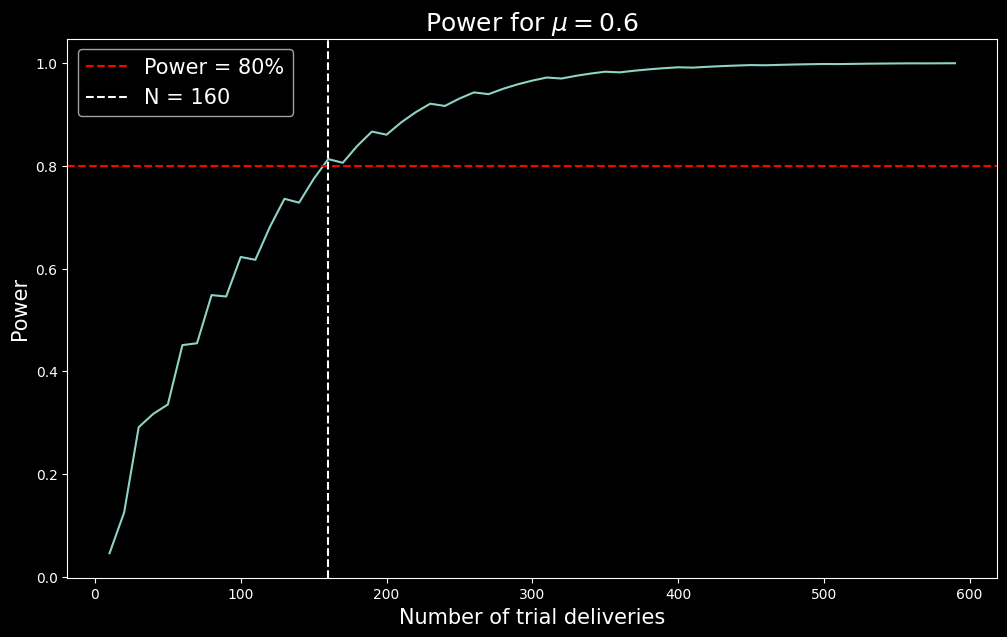

In [9]:
pyplot.figure(figsize=(12, 7))
pyplot.title('Power for $\mu = 0.6$', fontsize=18)
pyplot.xlabel('Number of trial deliveries', fontsize=15)
pyplot.ylabel('Power', fontsize=15)

pyplot.plot(n_grid, power)
pyplot.axhline(0.8, ls='--', color='red', label='Power = 80%')

# считаем минимальный размер выборки для мощности в 80%
min_n = n_grid [power >= 0.8].min()
pyplot.axvline(min_n, ls='--', color='white', label=f'N = {min_n}')

pyplot.legend(fontsize=15)
pyplot.show()

In [10]:
min_n

160

Видим, что для мощности в 80%  достаточно набрать 160 поставок.

А что, если мы хотим детектировать еще меньший эффект? Например, если хотим отвергать гипотезу при $\mu=0.51$. Часто улучшение вероятности успеха на 1% может быть значимым для продукта, поэтому этот вопрос не лишен смысла.

In [11]:
n_grid = numpy.arange(10, 30000, 59)

# можем вычислить
power = get_stat_power(N=n_grid, mu_h0=0.5, mu_factual=0.51, alpha=0.05)

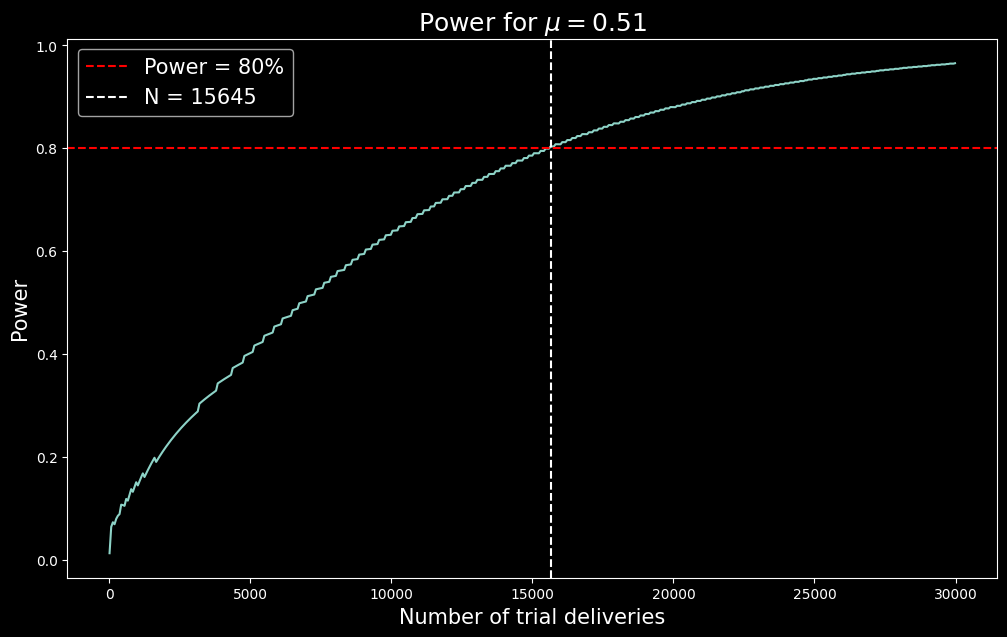

In [12]:
pyplot.figure(figsize=(12, 7))
pyplot.title('Power for $\mu = 0.51$', fontsize=18)
pyplot.xlabel('Number of trial deliveries', fontsize=15)
pyplot.ylabel('Power', fontsize=15)

pyplot.plot(n_grid, power)
pyplot.axhline(0.8, ls='--', color='red', label='Power = 80%')

# считаем минимальный размер выборки для мощности в 80%
min_n = n_grid [power >= 0.8].min()
pyplot.axvline(min_n, ls='--', color='white', label=f'N = {min_n}')

pyplot.legend(fontsize=15)
pyplot.show()

Видим, что потребуется более 15 тыс. клиентов, чтобы детектировать такой эффект! Очень сложно найти столько пробных клиентов. Но нужно задаться вопросом, а стоит ли это делать? В нашем случае, если вероятность успеха 51%, то прибыльность заказов будет небольшая, и вложения инвесторов конечно будут окупаться, но очень долго. Поэтому увеличение на 1 для нашей задачи не значимо ***практически***, а значит не нужно стараться набрать 15 тыс. людей, а можно остановиться на 160.

Перед каждым экспериментом аналитику стоит задумываться над вопросом длительности теста и количества участников. Для этого нужно понять:
- какой эффект является для задачи практически значимым
- сколько потребуется испытуемых, чтобы детектировать этот эффект чаще, чем в 80% случаев?

По графикам видно, что для детектировани яменьшего эффекта нужен больший размер выборки. Посмотрим, как для фиксированного N=30 меняется модность для разных параметов $μ$.

In [13]:
mu_grid = numpy.linspace(0.5, 1, 500)

# можем вычислить
power = get_stat_power(N=30, mu_h0=0.5, mu_factual=mu_grid, alpha=0.05)

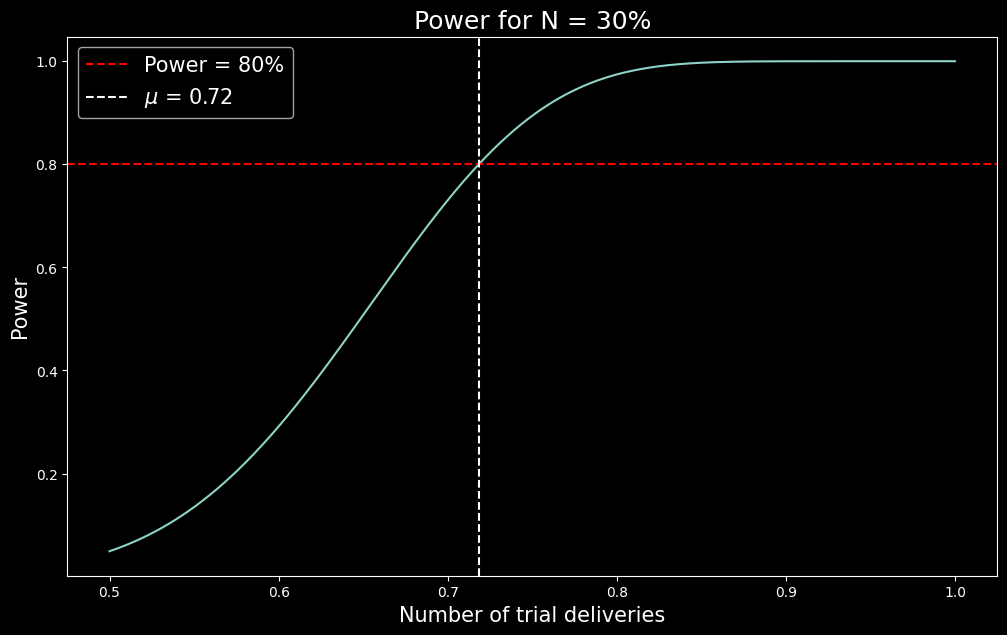

In [14]:
pyplot.figure(figsize=(12, 7))
pyplot.title('Power for N = 30%', fontsize=18)
pyplot.xlabel('Number of trial deliveries', fontsize=15)
pyplot.ylabel('Power', fontsize=15)

pyplot.plot(mu_grid, power)
pyplot.axhline(0.8, ls='--', color='red', label='Power = 80%')

# считаем минимальный размер выборки для мощности в 80%
min_mu = mu_grid [power >= 0.8].min()
pyplot.axvline(min_mu, ls='--', color='white', label=f'$\mu$ = {min_mu:.2f}')

pyplot.legend(fontsize=15)
pyplot.show()

# 2.3 [Minimum Detectable Effect aka MDE](https://www.youtube.com/watch?v=G4_Q0ekjm2Q&t=7s)

Выше на графика мы увидали, что с хорошей мощностью больше 80% мы можам заметить эффект з 22 процентных пункта. Причём это можно посчитать даже до проведения эксперимента. В нашем случае такое увеличение успешности относительно 0.5 вполне возможна, и с ним можно работать. Но когда аналитики проверяют изменения, зачастую ожидаемый эффект колеблется в районе одного, максимум двух процентов! Для подобных изменений не подойдёт выбранная постановка эксперимента, в значит и проводить его не имеет смысла.

Поэтому перед запуском экспериментов вналитики сообщают минимальную величину эффекта, который можно задетектировать. Она так и называется, минимальный детектирузныый эффект, сокращённо МDE (Minimal Detectable Effect). В нашем случае МДЕ = +22 п.л.

Более формально, MDE для гипотезы Н0: $\mu = \mu_0$ это минимальный эффект $δ$, при котором критерий уровня значимости $α$ для проверки этой гипотезы при истинном параметре $\mu = \mu_0 = δ$ и размера выборки N будет отвергать H0 с мощностью большей, чем $1-β$

Чаще всего берут $1-β=80%$. Напишем функцию, катарая будет вычислять MDE подбором.

Насколько велик должен быть эффект, чтобы мощность была 0,8+?

В зависимости от значения factual mu, тем больше power (тем легче прокрасить тест).

В сетапе MDE = +22 pp (процентных пункта)

Сетам эксперимента.

В том сетапе эксперимента, который вы сделали MDE должен быть на 22pp выше базы.


In [15]:
def binom_test_mde_one_sided(N, mu0, alpha=0.05, min_power=0.8):
  """Вычисляет MDE одностороннего критерия для проверки гипотезы пи пив в задаче с доставкой

  Параметры:

  № (int) размер выборки

  mu0 (float) вероятность успеха в нулевой гипотезе

  alpha (float) уровень значимости критерия

  min_power (float) желаемая мощность

  Возвращает:

  float - MDE"""

  delta_grid = numpy.linspace(0, 1 - mu0, 500)
  power = get_stat_power(N, mu0, mu0 + delta_grid, alpha=alpha)
  # выберем подходящие delta и вернем первую
  fit_delta = delta_grid[power >= min_power]

  return fit_delta[0]

In [16]:
binom_test_mde_one_sided(30, 0.5)

0.21843687374749496

# 2.4. [Доверительный интервал](https://www.youtube.com/watch?v=1lrnH2YEZbk&t=4s)

Множество допустимых значений


In [17]:
binom_h0 = binom(
n = 30, # количество испытаний
p = 0.5 # вероятность успеха
)

In [18]:
def two_sided_criterion_get_critical_values(n, mu, alpha):
  """Строит двусторонний критерий для несимметричной задачи с доставкой
  Параметры:
    n: количество доставок в эксперименте
    mu: вероятность успеха в нулевой гипотезе
    alpha: уровень значимости критерия

  Возвращает:
    С1, С2 для критерия S = {Q <= C1 или Q >= C2}
  """
  binom_h0 = binom(n=n, p=mu)

  # аналогично одностороннему критерию
  c2 = binom_h0.ppf(1 - alpha/2) + 1

  # по выкладкам выше
  c1 = binom_h0.ppf(alpha/2) - 1

  return c1, c2

In [19]:
two_sided_criterion_get_critical_values(n=30, mu=0.8, alpha=0.10)

(19.0, 28.0)

In [20]:
success_cnt = 28
mu_grid = numpy.arange(0, 1, 0.001)
mu_no_rejection = []

for mu_h0 in mu_grid:
  c1, c2 = two_sided_criterion_get_critical_values(n=30, mu=mu_h0, alpha=0.10)
  if success_cnt > c1 and success_cnt < c2:
    mu_no_rejection.append(mu_h0)

print('95% cinfidence interval: {} - {}'.format(min(mu_no_rejection), max(mu_no_rejection)))

95% cinfidence interval: 0.805 - 0.988


Если из 30 доставок мы получили 28 успехов, то вероятность лежит в интерфале от 0.805 до 0.988 [0.805;0.988]. Поскольку базовое значение 0,5 не входит в доверительный интервал, то H0 можно смело отвергнуть.

In [21]:
success_cnt = 19
mu_grid = numpy.arange(0, 1, 0.001)
mu_no_rejection = []

for mu_h0 in mu_grid:
  c1, c2 = two_sided_criterion_get_critical_values(n=30, mu=mu_h0, alpha=0.10)
  if success_cnt > c1 and success_cnt < c2:
    mu_no_rejection.append(mu_h0)

print('95% cinfidence interval: {} - {}'.format(min(mu_no_rejection), max(mu_no_rejection)))

95% cinfidence interval: 0.467 - 0.778


Можно проверить, что допустимые значения образуют именно интервал. Впоследствии это можно будет увидеть по графикам.

Если из 30 доставок мы получили 19 успехов, доверительный интервал [0.467; 0.778].

Получив такой интервал. мы сразу можем сделать вывод, что гипотеза $H_0 : μ = 0.5$ не отвергается, поскольку 0,5 лежит в доверительном интервале. Но при этом сразу понятно, что $μ != 0.4$ на уровне значимости $α$.

Конечно же, в доверительном интервале лежит значение $\mu=\frac{19}{30}$, для которого 19 успехов, это самый правдоподобный результат. При этом интервал несимметричен относительно точки $\frac{19}{30}$.

В двустороннем тесте при проверке доверительного интервала увеличиваем alpha иначе бы нижняя граница спустилась!!!

#2.4/1 [Доверительный интервал](https://www.youtube.com/watch?v=eM_80-3F0Pc)
Confidence interval (CI)

- Критерий $α$
- Статистика Q
- Доверительный интервал для параметра $μ$ - строится на основе реализации статистики Q

$CI_μ = [L(Q) ... R(Q)]$
$P(истинное\ \mu ⊂ CI_μ) ≥ 1 - α$

Утверждается, что истинное $μ$ принадлежит Доверительному интервалу с вероятностью $1-α$

Доверительный интервал с вероятностью $1-α$ будет корректным.

Допустим мы знаем истинное мю.
Доверительный интервал имеет уровень доверия (confidence level) $1-α$

In [23]:
def my_binomial_confint(n, alpha, q):

  """Вычисляет доверительный интервал для выборки из распределения Бернулли
    n (int) количество элементов в выборке
    alpha (float) уровень значимости критерия
    q (float) реализация статистики критерия
  """
  mu_grid = numpy.arange(0, 1.001, 0.001)
  mu_no_rejection = []
  for mu_h0 in mu_grid:
    c1, c2 = two_sided_criterion_get_critical_values(30, mu_h0, alpha=0.10)
    if q > c1 and q < c2:
      mu_no_rejection.append(mu_h0)

  return min(mu_no_rejection), max(mu_no_rejection)

In [24]:
numpy.random.seed(202312)

In [25]:
N_EXPERIMENTS = 1000
SAMPLE_SIZE = 30
mu_factual = 0.5 # "истинное" значение параметра
binom_true = binom(n=SAMPLE_SIZE, p=mu_factual) # "истинное" распределение
confint_fail_cases = 0

for i in range(N_EXPERIMENTS):
  q = binom_true.rvs() # в генерируем сразу сумму элементов
  L, R = my_binomial_confint(n=SAMPLE_SIZE, alpha=0.10, q=q)
  if L <= mu_factual <= R:
    pass #вce хорово
  else:
    confint_fail_cases += 1

print(1 - confint_fail_cases / N_EXPERIMENTS)

0.911


#2.4/2 [Доверительный интервал Уилсона](https://www.youtube.com/watch?v=TWAtqDiKhuc&list=PLMv83iwSomR0LpdnMd3xWn_Wgx_VzMkr8&index=11)

In [27]:
from statsmodels.stats.proportion import proportion_confint

Повторим эксперименты с новым типом доверительного интервала. тут можем позволить больше реализаций выборки, поскольку интервал считаетс недолго.

In [28]:
N_EXPERIMENTS = 1000
SAMPLE_SIZE = 30
mu_factual = 0.5 # "истинное" значение параметра
binom_true = binom(n=SAMPLE_SIZE, p=mu_factual) # "истинное" распределение
confint_fail_cases = 0

for i in range(N_EXPERIMENTS):
  q = binom_true.rvs() # в генерируем сразу сумму элементов
  L, R = proportion_confint(
      count=q,
      nobs=SAMPLE_SIZE,
      alpha=0.10,
      method='wilson'
      )
  if L <= mu_factual <= R:
    pass #вce хорово
  else:
    confint_fail_cases += 1

print(1 - confint_fail_cases / N_EXPERIMENTS)

0.903


In [29]:
numpy.random.seed(202312)
N_EXPERIMENTS = 1000
n_grid = numpy.arange(5, 100, 5).tolist()
interval_success_rate = []

Зависимость доли успешных попаданий $μ$ в доверительный интервал от размера выборки изобразим на графике.

In [33]:
numpy.random.seed(202312)
N_EXPERIMENTS = 1000

n_grid = numpy.arange(5, 100, 5).tolist()
interval_success_rate = []

for n in n_grid:
  confint_fail_cases = 0
  for i in range(N_EXPERIMENTS):
    binom_true = binom(n=n,p=mu_factual)
    q = binom_true.rvs()
    L, R = proportion_confint(
      count = q, # количество успехов
      nobs=n, # размер выборки
      alpha = 0.1,
      method='wilson'
    )
    if L <= mu_factual <= R:
      pass # всё хорошо
    else:
      confint_fail_cases += 1
  interval_success_rate.append(1 - confint_fail_cases / N_EXPERIMENTS)

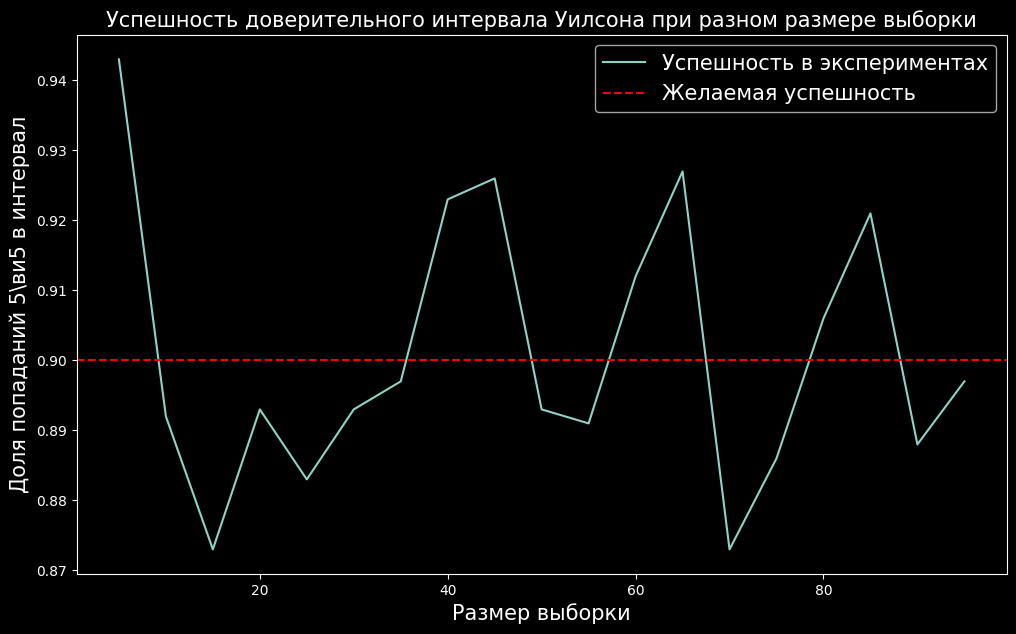

In [36]:
pyplot.figure(figsize=(12, 7))
pyplot.title('Успешность доверительного интервала Уилсона при разном размере выборки', fontsize=15)
pyplot.xlabel('Размер выборки', fontsize=15)
pyplot.ylabel('Доля попаданий 5\ви5 в интервал', fontsize=15)
pyplot.plot(n_grid, interval_success_rate, label='Успешность в экспериментах')
pyplot.axhline(0.90, ls='--', label='Желаемая успешность', color='red')
pyplot. legend(fontsize=15)
pyplot.show()

# 2.5. [Алгоритм проверки гипотез](https://www.youtube.com/watch?v=2RdpsevXDMs&list=PLMv83iwSomR0LpdnMd3xWn_Wgx_VzMkr8&index=11)

## 1. Бизнес-задача / бизнес гипотеза
Гипотеза: Наша модель прибыльная
Под капотом, это означает, что люди выкупают доставленные вещи в **более** чем 50% случаев.
## 2. Формулируем нулевую и альтернативную гипотезы
H0: $μ = 0.5$ - выкупают в половине случаев (0 прибыли)

H1: $μ > 0.5$ - выкупают в больше, чем половине случаев (есть прибыль)
## 3. Выбираем статистику
Статистика - некоторое число, которое будет коворить на о том, насклько похожа H0 на правду.

$Статистика\ Q = сумма\ успехов = \sum_{n=1}^{n}Bernouli(μ)$

Q -  теоретическое описание описание статистики, которое каждый раз при проведении эксперимента реализуется по-разному

q - конкретная реализация в конкретно взятом эксперименте (в нашем примере, $μ = 19$)
##4. Понять как статистика Q распределена, если верна нулевая гипотеза
alpha - как часто ошибаемся,

p-value - площадь всех столобцов графика, попадание в который выглядит слишком экстремально
##5. MDE
Каким должен быть минимальный эффект, чтобы мы могли задетектировать изменение.
Зависит от
- размер выборки $n$
- искомая мощность $β$ (FP)
- уровень


##6. Построить Доверительный интервал
$\mu ⊂ [0.55 ... 0.87]$